## K-Mean Clustering

<img src="./K_Mean_1.png" />

**Steps for the K-Mean Clustering**

<img src="./K_Mean_Steps.png" />

Let's apply above algorithm on a set of data points, and take K as 2.

<img src="./K_Mean_Step_1.png"/>

<img src="./K_Mean_Step_2.png"/>

<img src="./K_Mean_Step_3.png"/>

<img src="./K_Mean_Step_4.png"/>

<img src="./K_Mean_Step_5.png"/>

<img src="./K_Mean_Step_6.png"/>

<img src="./K_Mean_Step_7.png"/>

<img src="./K_Mean_Step_8.png"/>

<img src="./K_Mean_Step_9.png"/>

<img src="./K_Mean_Step_10.png"/>

In this way, the K-Mean Clustering works.

> #### Random Initialization Trap : If somehow we select very bad initial K centroids, the result may vary. To avoid this issue instead of K-Mean Clustering , K-Mean++ Clustering is used.
<br/>

### Choosing right number of cluster [The Elbow Technique]
In any dataset, we can have minimum one cluster, and maximum N cluster, N is the total data points.

In the first step we need to select the value of K, For better selection we can use **Within Cluster Sum of Squares (WCSS)** technique

$$ WCSS = \sum_{i=1}^{K} \sum_{j=1}^{N_{i}} Distance(C_{i},P_{ij})^{2} $$
$$ K : No \ \  of \ Clusters $$
$$ N_{i} :  No \ \  of \ Points \  inside \ i^{th} \  Cluster $$
$$ C_{i} : Centroid \ \  of \ i^{th} \  Cluster $$
$$ P_{ij} :  j^{th} \ Point \ \  inside \ i^{th} \  Cluster $$

For below datapoints

- K = 1
<img src="./Choose_K_1.png"/>
- K = 2
<img src="./Choose_K_2.png"/>
- K = 3
<img src="./Choose_K_3.png"/>

As we increase K, value of WCSS keeps decreasing, **Inversly Proportinal**

$$ WCSS \propto \frac {1} {K} $$

Below is the graph between **WCSS vs K**

<img src="./WCSS_Graph.png"/>

The shape of the graph is very simillar to a human hand, and it was found that the point near elbow of the graph is the best value of K.

<img src="./WCSS_Graph_Elbow.png"/>

In [1]:
# Data Preprocessing

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('./Datasets/Mall_Customers.csv')

X = dataset.iloc[:,[3,4]].values

print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

### Using the Elbow methods, to find optimal value of K

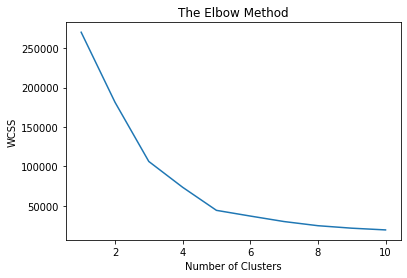

'\nFrom below graph, it is clear that K = 5 is the optimal value\n'

In [2]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()
'''
From below graph, it is clear that K = 5 is the optimal value
'''

### Training the K-Means Clustering Model on Training Dataset

In [3]:
K = 5
kmeans = KMeans(n_clusters = K, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


### Visualizing the cluster

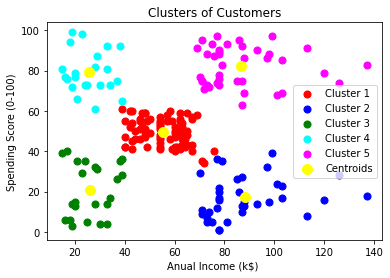

In [4]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'red', label =  'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'blue', label =  'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'green', label =  'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 50, c = 'cyan', label =  'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 50, c = 'magenta', label =  'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.title("Clusters of Customers")
plt.xlabel("Anual Income (k$) ")
plt.ylabel("Spending Score (0-100)")
plt.legend()
plt.show()